In [1]:

import pandas as pd
df=pd.read_csv("/kaggle/input/pipeline-data/shuffled_data_for_pipeline")

In [2]:
df.columns

Index(['Unnamed: 0', 'Distance(mi)', 'State', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal',
       'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Hour', 'Day_of_Week',
       'Day_Type', 'Season', 'Time_Of_Day', 'Duration', 'Severity'],
      dtype='object')

In [3]:
df=df.drop(['Unnamed: 0','Year', 'Month', 'Day', 'Hour', 'Day_of_Week','State'],axis=1)

In [4]:
df.columns

Index(['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Sunrise_Sunset', 'Day_Type', 'Season', 'Time_Of_Day',
       'Duration', 'Severity'],
      dtype='object')

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])




gb_boost = GradientBoostingClassifier(n_estimators=300, random_state=42)



pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gb_boost)
])


n_splits = 5*2  


stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_scores = cross_val_score(pipeline, X_train, y_train, cv=stratified_kfold, scoring='accuracy')


print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Mean Accuracy: 0.728375
Standard Deviation: 0.006912963366024744
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.84      0.80      2047
           2       0.70      0.59      0.64      1967
           3       0.75      0.72      0.74      1986
           4       0.70      0.76      0.73      2000

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000

Confusion Matrix:
[[1715   16  303   13]
 [  55 1170  137  605]
 [ 459   53 1436   38]
 [   9  438   35 1518]]
Accuracy: 0.729875


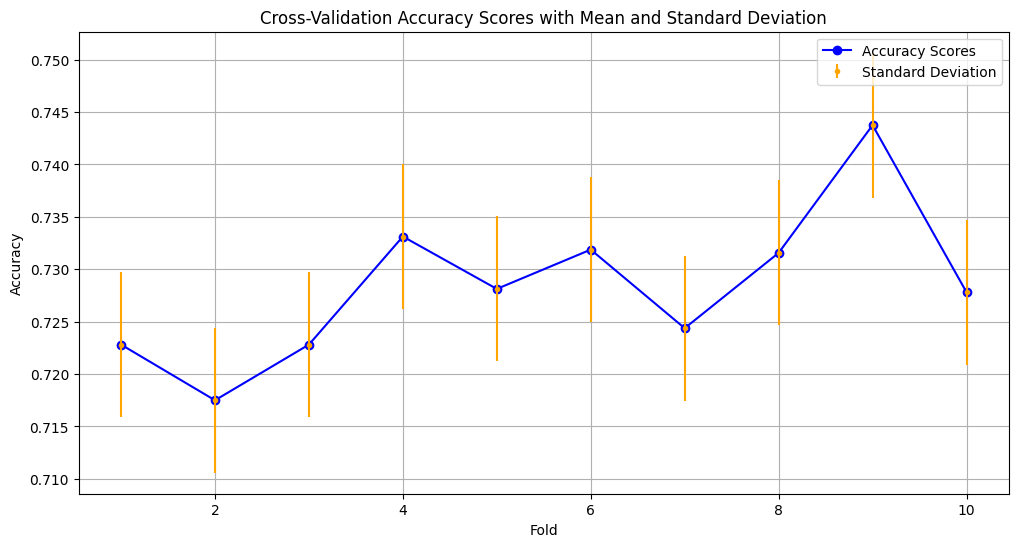

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))


plt.plot(range(1, n_splits + 1), cv_scores, marker='o', linestyle='-', color='blue', label='Accuracy Scores')



plt.errorbar(range(1, n_splits + 1), cv_scores, yerr=np.std(cv_scores), linestyle='None', marker='.', color='orange', label='Standard Deviation')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores with Mean and Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import joblib
joblib.dump(pipeline, 'your_pipeline_filename.joblib')


['your_pipeline_filename.joblib']